In [1]:
#python modules
import numpy as np
import glob
import pickle
from netCDF4 import Dataset
import folium
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import base64
from folium.element import IFrame
from folium import plugins
import cmocean
from mpl_toolkits.basemap import Basemap
from folium import colormap as cm
from folium.map import *

In [2]:
%load_ext pypath_magic

In [3]:
# add temporarily to the python the required local paths. Make sure you clean up afterwards.
# It won't run if ~/pypath_magic.pth is not empty to begin with.
%pypath -a /home/critechuser/REPOS/StormS/src/
%pypath -a /home/critechuser/REPOS/StormS/utils/

Added u'/home/critechuser/REPOS/StormS/src' to path.
Added u'/home/critechuser/REPOS/StormS/utils' to path.


In [4]:
#local modules
from grid import *
from dep import *
from cmap2gdf import *
from float_image import FloatImage
from Bind import BindColormap
#from point_history import getmes
#from get_point_map import get
#from get_point_history import pget


In [5]:
# clean up 
%pypath -d /home/critechuser/REPOS/StormS/src/
%pypath -d /home/critechuser/REPOS/StormS/utils/

Deleted u'/home/critechuser/REPOS/StormS/src' from path
Deleted u'/home/critechuser/REPOS/StormS/utils' from path


In [6]:
import itertools

In [6]:
%matplotlib notebook

In [7]:
path='../test/'

In [8]:
# check contents of folder
tfolder = glob.glob(path+'*')
tfolder

['../test/viewer.html',
 '../test/tmp.pkl',
 '../test/png',
 '../test/20170212.00',
 '../test/sspng.png']

In [9]:
# exclude pkl file from contents of folder
tfolder = [t for t in tfolder if '.pkl' not in t]
tfolder
tfolder = [t for t in tfolder if 'png' not in t]
tfolder
tfolder = [t for t in tfolder if 'html' not in t]
tfolder

['../test/20170212.00']

In [10]:
tl = [t.split('/')[-1] for t in tfolder]

In [11]:
tl

['20170212.00']

In [12]:
calc_dir=path+tl[0]+'/' # define project folder, usually the first time stamp folder

In [13]:
pfile = glob.glob(path+'*.pkl')[0]
pfile

'../test/tmp.pkl'

In [14]:
# read pref file
with open(pfile, 'r') as f:
    dic=pickle.load(f)

In [15]:
basename=dic['bname']

In [16]:
#read obs points dictionary
with open(calc_dir+basename+'.pkl', 'r') as f:
    ptr=pickle.load(f)

### read grid 

In [17]:
d=Dataset(calc_dir+'trim-'+basename+'.nc')

In [18]:
xg=d['XCOR'][:] #grid points
yg=d['YCOR'][:]

In [19]:
xz=d['XZ'][:] #
yz=d['YZ'][:]

## Define map coordinates

In [20]:
#center of lat/lon window
plat = yz.mean()
plon = xz.mean()

In [21]:
%%skip
a=np.arange(xg.shape[0])
b=np.arange(xg.shape[1])
glist=[]
for r in itertools.product(a,b): glist.append([r[0],r[1]])
#glist

In [22]:
grid=FeatureGroup(name='Grid')

In [23]:
#draw horizontal lines of grid
for k in xrange(xg.shape[0]):
    try:
        xgrid=zip(yg[k,:],xg[k,:])
        ygrid=zip(yg[k,:],xg[k,:])
        folium.PolyLine(xgrid,weight=.5, color='black').add_to(grid)
        folium.PolyLine(ygrid,weight=.5, color='black').add_to(grid)
    except Exception as e:
        print e
        pass

In [24]:
#draw horizontal lines of grid
for k in xrange(1,xz.shape[0]-1):
    try:
        xgrid=zip(yz[k,1:-1],xz[k,1:-1])
        ygrid=zip(yz[k,1:-1],xz[k,1:-1])
        folium.PolyLine(xgrid,weight=.3, color='blue').add_to(grid)
        folium.PolyLine(ygrid,weight=.3, color='blue').add_to(grid)
    except Exception as e:
        print e
        pass

In [25]:
#draw vertical
for k in xrange(xg.shape[1]):
    try:
        xgrid=zip(yg[:,k],xg[:,k])
        ygrid=zip(yg[:,k],xg[:,k])
        folium.PolyLine(xgrid,weight=.5, color='black').add_to(grid)
        folium.PolyLine(ygrid,weight=.5, color='black').add_to(grid)
    except Exception as e:
        print e
        pass

In [26]:
#draw vertical
for k in xrange(1,xz.shape[1]-1):
    try:
        xgrid=zip(yz[1:-1,k],xz[1:-1,k])
        ygrid=zip(yz[1:-1,k],xz[1:-1,k])
        folium.PolyLine(xgrid,weight=.3, color='blue').add_to(grid)
        folium.PolyLine(ygrid,weight=.3, color='blue').add_to(grid)
    except Exception as e:
        print e
        pass

In [27]:
%%skip
for k,l in glist:
# draw grid points        
  folium.CircleMarker([yg[k,l],xg[k,l]], popup='{},{}'.format(k,l), radius=50).add_to(mapa)
# draw staggered pressure points
  folium.CircleMarker([yz[k,l],xz[k,l]], popup='{},{}'.format(k,l), radius=50, fill_color='red').add_to(mapa)


In [28]:
mapa = folium.Map(location=[plat, plon], zoom_start=4)

In [29]:
#%%skip
folium.LatLngPopup().add_to(mapa) # click to show lat lon

In [30]:
mapa.add_children(grid)
folium.LayerControl().add_to(mapa)

In [31]:
mapa

## obs points

In [384]:
df = pd.read_csv('../src/SeaLevelBuoys2.csv', encoding = 'utf8')

In [385]:
df.head()

ID       lat       lon                                               name  \
0  10  48.86000 -175.6000                   Station 46413 - East of ADAK, AK   
1  11  49.63000 -169.8700                    Station 46408 - NW Pacific S AK   
2  12  49.63000 -169.8700                    Station 46408 - NW Pacific S AK   
3  13 -19.55000  -74.8100  Station 32401 - 260 NM West-Southwest of Arica...   
4  14 -18.13419  178.4236                              Suva, Viti Levu, Fiji   

   status COUNTRY  
0  active     NaN  
1  active     NaN  
2  active     NaN  
3  active     NaN  
4  active     NaN

In [386]:
df['jref'] = [ptr[i] if i in ptr.keys() else np.nan for i in df.ID.values]

In [387]:
df.head()

ID       lat       lon                                               name  \
0  10  48.86000 -175.6000                   Station 46413 - East of ADAK, AK   
1  11  49.63000 -169.8700                    Station 46408 - NW Pacific S AK   
2  12  49.63000 -169.8700                    Station 46408 - NW Pacific S AK   
3  13 -19.55000  -74.8100  Station 32401 - 260 NM West-Southwest of Arica...   
4  14 -18.13419  178.4236                              Suva, Viti Levu, Fiji   

   status COUNTRY  jref  
0  active     NaN   NaN  
1  active     NaN   NaN  
2  active     NaN   NaN  
3  active     NaN   NaN  
4  active     NaN   NaN

In [388]:
#drop the not relevant locations
df = df.dropna(subset=['jref'])
df.jref = df.jref.apply(pd.to_numeric) #convert to integer

In [389]:
df = df.reset_index(drop=True) #reset the index

In [390]:
mapa = folium.Map(location=[plat, plon], zoom_start=4) # reset map

In [34]:
## put on the map

In [35]:
mc = folium.MarkerCluster().add_to(mapa)

In [36]:
for idx, v in df.iterrows():
    folium.Marker([v.lat,v.lon], popup=v['name']).add_to(mc)


In [37]:
mapa

## overlay obs point data

In [33]:
#read netcdf
h=Dataset(calc_dir+'trih-'+basename+'.nc')

In [34]:
ha = h['ZWL'][:]
t = h['time'][:]

In [35]:
idate=datetime.datetime.strptime(tl[0],'%Y%m%d.%H' )

In [36]:
#construct datetime
tw=[]
for it in t:
        tw.append(idate+datetime.timedelta(seconds=np.int(it)))
ttw=[(item-t[0])/60. for item in t]


In [37]:
resolution, width, height = 75, 8, 4

In [38]:
mapa = folium.Map(location=[plat, plon], zoom_start=4) # reset map

In [39]:
marker_cluster = folium.MarkerCluster().add_to(mapa)


In [40]:
plt.ioff()
for iobs in range(5):#  for testing see full output from scipt
  
    gdic={'time':tw,'ha':ha[:,df.iloc[iobs].jref.astype(int)]}

    gf = pd.DataFrame(gdic)

    gf.time = gf.time.apply(pd.to_datetime) #convert to datetime
    gf = gf.set_index('time')

#create a graph, choose a station
    station = df.iloc[iobs]['name']
    print station
    
    fig, ax = plt.subplots(figsize=(width, height))
    ax = gf.plot(ax = ax, legend=False)
    ax.set_ylabel('Sea surface height (m)')
    ax.set_title(station)
    png = path+'png/{}.png'.format(station.encode('utf-8').strip())
    fig.savefig(png, dpi=resolution)
    
    encoded = base64.b64encode(open(png, 'rb').read())
    html = '<img src="data:image/png;base64,{}">'.format
    iframe = IFrame(html(encoded), width=(width*resolution)+20, height=(height*resolution)+20)
    popup = folium.Popup(iframe, max_width=2650)

    icon = folium.Icon(color="red", icon="ok")
    marker = folium.Marker(location=[df.iloc[iobs].lat, df.iloc[iobs].lon], popup=popup, icon=icon)
    mapa.add_children(marker);

NameError: name 'df' is not defined

In [41]:
mapa

## save html

In [144]:
mapa.save(path+'viewer.html')

## add storm surge to map 

In [42]:
#read values
hz=d['S1'][:]

In [43]:
plt.ion()

In [44]:
#READ GRID /BATHYMETRY
grd=Grid.fromfile(calc_dir+basename+'.grd')
deb=Dep.read(calc_dir+basename+'.dep',grd.shape)
b=deb.val[:,:]
w=np.isnan(b)
w=w.T


In [45]:
lons=xz[1:-1,1:-1]
lats=yz[1:-1,1:-1]

In [46]:
lon0, lon1, lat0, lat1 = lons.min(),lons.max(),lats.min(),lats.max()

In [47]:
#define projection Mercator
m = Basemap(projection='merc',llcrnrlat=lat0,urcrnrlat=lat1,\
             llcrnrlon=lon0,urcrnrlon=lon1,resolution='h')

In [48]:
# define parallels and meridians to draw.
parallels = np.arange(-90.,90,20.)
meridians = np.arange(0.,360.,20.)

In [49]:
xx,yy=m(lons,lats)

In [50]:
#mask values
w.shape,hz[-1,1:-1,1:-1].shape

((184, 104), (182, 102))

In [51]:
pz =np.ma.masked_where(w[1:-1,1:-1]==True, hz[-1,1:-1,1:-1])

In [52]:
xx.shape,yy.shape,pz.shape

((182, 102), (182, 102), (182, 102))

<IPython.core.display.Javascript object>


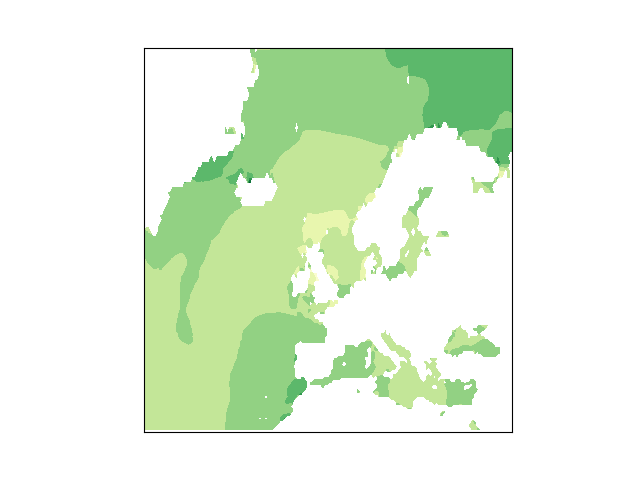

In [301]:
# create png image
plt.figure()
m.contourf(xx,yy,pz,cmap=plt.get_cmap('YlGn'))
# draw coastlines, parallels, meridians.
#m.drawcoastlines(linewidth=1.5)
#m.drawparallels(parallels)
#m.drawmeridians(meridians)


plt.savefig(path+'sspng',transparent=True,bbox_inches='tight', pad_inches=0)

In [54]:
from scipy.ndimage import imread

In [55]:
# read in png file to numpy array
data = imread(path+'sspng.png')


## WITH numpy manipulation 

In [333]:
from PIL import Image, ImageEnhance

In [334]:
im = Image.fromarray(plt.get_cmap('YlGn')(np.flipud(pz.T), bytes=True))

<IPython.core.display.Javascript object>


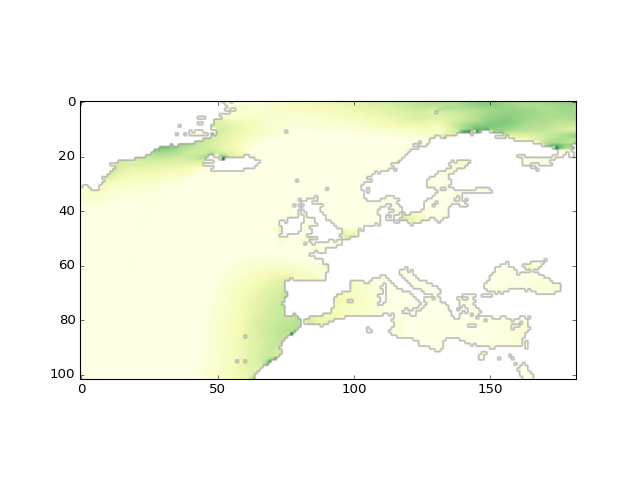

In [347]:
plt.imshow(im)

In [341]:
im2=ImageEnhance.Sharpness(im)

<IPython.core.display.Javascript object>


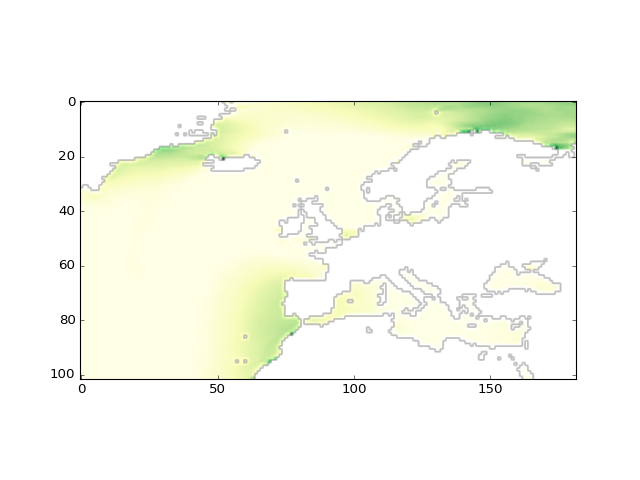

In [348]:
plt.imshow(im2.enhance(2))

In [316]:
v = np.asarray(im)

In [331]:
v.shape

(102, 182, 4)

In [65]:
#another option

In [74]:
from matplotlib.colors import Normalize

In [85]:
vmin=0.1
vmin=np.flipud(pz.T).min()

In [87]:
vmax=3.
vmax=np.flipud(pz.T).max()

In [88]:
norm=Normalize(vmin,vmax)

In [89]:
vcm =plt.get_cmap('YlGn')

In [90]:
n_cmap=plt.cm.ScalarMappable(norm=norm,cmap=vcm)

In [91]:
vdata= n_cmap.to_rgba(np.flipud(pz.T))

## test image overlay

In [56]:
min_lon=json.loads(str(lon0))
max_lon=json.loads(str(lon1))
min_lat=json.loads(str(lat0))
max_lat=json.loads(str(lat1))


In [92]:
mapa = folium.Map(location=[plat, plon], zoom_start=4) # reset map

In [93]:
Surge = plugins.ImageOverlay(vdata, opacity=0.8, \
        bounds =[[min_lat, min_lon], [max_lat, max_lon]],\
        attr = 'Storm Surge',mercator_project=True)

# add a name to the layer
Surge.layer_name = 'Storm Surge'

# Overlay the image
mapa.add_children(Surge)

# add the layer control
folium.LayerControl().add_to(mapa)


In [94]:
colormap = cm.linear.YlGn.scale(0, 3)#.to_step(10)
colormap.caption = 'Storm Surge'
mapa.add_child(colormap)

## test contour plot

In [302]:
nb_class = 20 
collec_poly = plt.contourf(lons,lats,pz, nb_class, cmap=plt.get_cmap('YlGn'), alpha=0.5)

gdf = collec_to_gdf(collec_poly) # From link above
gdf.to_json()
colors = [p.get_facecolor().tolist()[0] for p in collec_poly.collections]
gdf['RGBA'] = colors
gdf['RGBA'] = gdf['RGBA'].apply(convert_to_hex)

gdf

geometry     RGBA
0   (POLYGON ((-0.9986263513565063 54.621928644160...  #FdFeDe
1   (POLYGON ((-7.115740464566026 57.5661773681640...  #FaFdCd
2   (POLYGON ((-9.090682268951278 54.5367660522460...  #F7FcBc
3   (POLYGON ((-9.397415676264446 54.5367660522460...  #EfF8B3
4   (POLYGON ((-9.545330047607422 54.6944184660312...  #E4F4Ab
5   (POLYGON ((-23.67232464011292 65.1899949731275...  #D8EfA2
6   (POLYGON ((-23.74336335764609 65.2613376987696...  #C9E99b
7   (POLYGON ((-46.74862670898438 25.7573528289794...  #B8E293
8   (POLYGON ((-46.74862670898438 27.7769603729248...  #A9Db8c
9   (POLYGON ((-46.74862670898438 57.0612754821777...  #95D284
10  (POLYGON ((-43.58257922849204 59.7359902760630...  #81C97c
11  (POLYGON ((-42.35650395135312 62.1102943420410...  #6eC174
12  (POLYGON ((-36.70635652206867 65.6318766784256...  #59B769
13  (POLYGON ((-33.42359079119704 66.9091061741885...  #45Ad5f
14  (POLYGON ((-20.60577011108398 66.0982306124502...  #38A055
15  (POLYGON ((-20.60577011108398 66.0355081656407...  #2d914c
16  (POLYGON ((-20.60577011108398 65.9727857188312...  #228342
17  (POLYGON ((-20.60577011108398 65.9100632720218...  #16793e
18  POLYGON ((-20.60577011108398 65.84734082521233...   #86f3a
19  POLYGON ((-20.60577011108398 65.78461837840284...  #006435
20  POLYGON ((-20.60577011108398 65.72189593159337...  #005730
21  POLYGON ((-20.60577011108398 65.65917348478388...  #004a2b

In [429]:
mapa = folium.Map(location=[plat, plon], zoom_start=4) # reset map

In [430]:
colors = []
Contours = folium.GeoJson(
    gdf,
    style_function=lambda feature: {
        'fillColor': feature['properties']['RGBA'],
        'color' : feature['properties']['RGBA'],
        'weight' : 1,
        'fillOpacity' : 0.5,
        }
    )

In [431]:
t = folium.FeatureGroup(name='Storm Surge')
t.add_children(Contours)

In [432]:
mapa.add_children(t)
folium.LayerControl().add_to(mapa)

In [433]:
#folium.GeoJson(gdf).add_to(mapa)

#### float an image

In [434]:
ec = 'https://ec.europa.eu/jrc/sites/jrcsh/themes/jrc_multisite_subtheme/logo.png'

In [435]:
FloatImage(ec, bottom=0, left=2).add_to(mapa)

In [436]:
ecmwf = 'http://www.ecmwf.int/sites/all/themes/ecmwf2013/logo.png'

In [437]:
ecmwf = 'http://www.ecmwf.int/sites/default/files/ECMWF_Master_Logo_RGB_nostrap.png'

In [438]:
FloatImage(ecmwf, bottom=95, left=5, height=4).add_to(mapa)

In [439]:
delft3d='https://oss.deltares.nl/image/image_gallery?uuid=13baea0c-1a8c-44c4-b4fa-89c7d4d68f3c&groupId=183920&t=1352473709104'

In [440]:
FloatImage(delft3d, bottom=85, left=5, height=8).add_to(mapa)

In [441]:
cm1 = cm.linear.YlGn.scale(0, 3)#.to_step(10)
cm1.caption = 'Storm Surge' 

In [442]:
mapa.add_child(cm1)
mapa.add_child(BindColormap(t,cm1))
mapa

In [443]:
mapa.save(path+'viewer.html')